In [1]:
import pickle
import lzma

with lzma.open('params_with_f_k=2_2024-05-06 10:13:31.086363.xz', 'rb') as f:
    params = pickle.load(f)

In [2]:
locals().update(params)

In [3]:
k

2

In [4]:
with lzma.open('movie_data_movielens.xz', 'rb') as f:
    train_movie_ratings_list, test_movie_ratings_list = pickle.load(f)


In [5]:
movie_ratings_list = [a+b for a, b in zip(train_movie_ratings_list, test_movie_ratings_list)]
del train_movie_ratings_list, test_movie_ratings_list

In [6]:
movie_indices = []
for index, movie in enumerate(movie_ratings_list):
    if len(movie) > 50:
        movie_indices.append(index)

In [7]:
popular_movies = V[movie_indices]

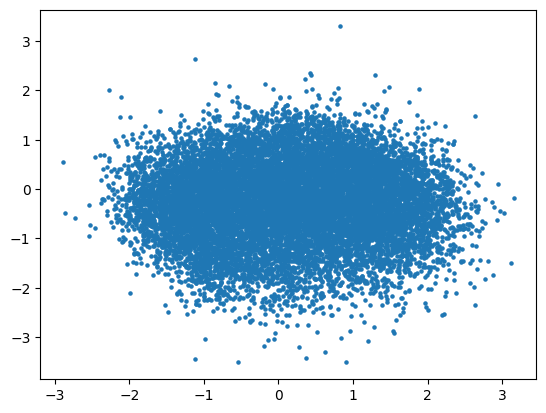

In [8]:
import matplotlib.pyplot as plt
plt.scatter(popular_movies[:, 0], popular_movies[:, 1], s=5)
plt.show()

In [109]:
import numpy as np
item_embedding_length = np.sqrt(V[:, 0]**2 + V[:, 1]**2)
polarizing_movies_len = 0.7 * (max(item_embedding_length) - min(item_embedding_length))
polarizing_movies_indices = np.where(item_embedding_length > polarizing_movies_len)[0]
len(polarizing_movies_indices)

41

In [110]:
with lzma.open('general_movielens.xz', 'rb') as f:
    userid_to_index, index_to_userid, movieid_to_index, index_to_movieid = pickle.load(f)
with lzma.open('movies_map.xz', 'rb') as f:
    title_to_id_moviesmap, id_to_title_moviesmap = pickle.load(f)

In [111]:
index_to_movieid = np.array(index_to_movieid)
polarizing_movies_ids = index_to_movieid[polarizing_movies_indices]
# for movie_id in polarizing_movies_ids:
#     print(id_to_title_moviesmap[movie_id])

False
True
False
True
False
True
False
True
False


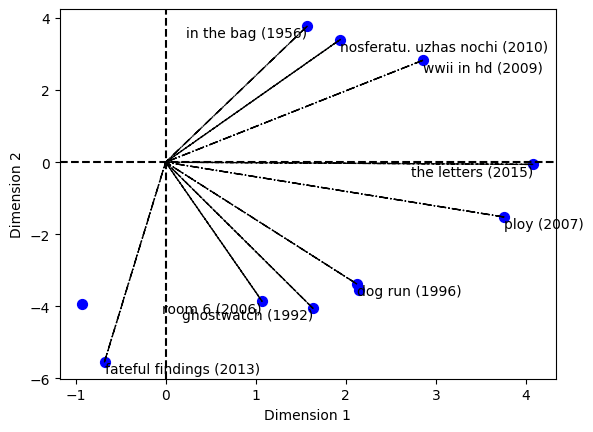

In [126]:
fig, ax = plt.subplots()
ax.scatter(V[polarizing_movies_indices[::4]][:,0], V[polarizing_movies_indices[::4]][:,1], c='blue', s=50)
ax.axhline(y=0, color='k', ls='--')
ax.axvline(x=0, color='k', ls='--')
a = True
for i, (movie_index, movie_id) in enumerate(zip(polarizing_movies_indices, polarizing_movies_ids)):
    if i%4 == 0 and len(id_to_title_moviesmap[movie_id]) < 30:
        ax.arrow(0, 0, V[movie_index,0], V[movie_index,1], ls='-.')
        if a == True:
            ax.annotate(id_to_title_moviesmap[movie_id], (V[movie_index,0], V[movie_index,1]), horizontalalignment='left', verticalalignment='top')
        if a == False:
            ax.annotate(id_to_title_moviesmap[movie_id], (V[movie_index,0], V[movie_index,1]), horizontalalignment='right', verticalalignment='top')
        a = not(a)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
# plt.show()
plt.savefig('polarizing_movies.pdf', bbox_inches='tight')